<a href="https://colab.research.google.com/github/jesusllg/Towards-a-Fair-Evaluation-Protocol-in-NAS-for-SRIR/blob/main/Patchify-Train-Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd "../Data_for_training/"

Mounted at /gdrive
/gdrive/MyDrive/Doctorate_Thesis_Coding/COMPSR-NET/Data_for_training


In [2]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import glob
import copy

import time

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow import keras, image
import random

from math import floor

from matplotlib import pyplot as plt
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array


from IPython.display import display

from collections import namedtuple

from patchify import patchify, unpatchify
from PIL import Image

# Image to Array

In [6]:
train_val_split_perc = 0.888889
val_test_split_perc = 0.5

In [7]:
img_paths = []
val_img_paths = []
for dirname, _, filenames in os.walk('../Data_for_training/DIV2K_train_HR'):
    for filename in filenames:
        img_paths.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../Data_for_training/DIV2K_valid_HR'):
    for filename in filenames:
        img_paths.append(os.path.join(dirname, filename))
        
print('Dataset dimension: ', len(img_paths))

val_img_paths = img_paths[floor(len(img_paths) * train_val_split_perc):]
img_paths = img_paths[:floor(len(img_paths) * train_val_split_perc)]
print('Training: ', len(img_paths))
print('Validation: ', len(val_img_paths))

Dataset dimension:  900
Training:  800
Validation:  100


In [8]:
img_arrays = []
for path in img_paths:
  im = Image.open(path)
  img_arrays.append(np.array(im))

In [9]:
print(len(img_arrays))

800


In [10]:
val_img_arrays = []
for path in val_img_paths:
  im = Image.open(path)
  val_img_arrays.append(np.array(im))

In [11]:
print(len(val_img_arrays))

100


In [12]:
im = Image.open(img_paths[0])

In [13]:
arr = np.array(im)

In [14]:
print(im.format, im.size, im.mode)

PNG (2040, 888) RGB


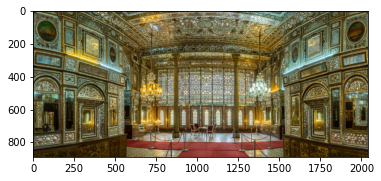

In [15]:
plt.imshow(im)
plt.show()

(888, 2040, 3)


<function matplotlib.pyplot.show(*args, **kw)>

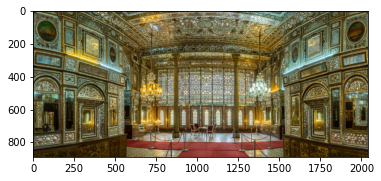

In [16]:
print(img_arrays[0].shape)
arr_ = np.squeeze(img_arrays[0])
plt.imshow(arr_)
plt.show

In [17]:
im = Image.open(val_img_paths[0])
print(im.format, im.size, im.mode)

PNG (1620, 2040) RGB


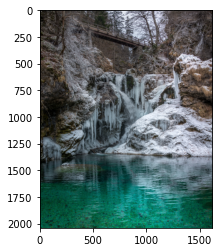

In [18]:
plt.imshow(im)
plt.show()

(2040, 1620, 3)


<function matplotlib.pyplot.show(*args, **kw)>

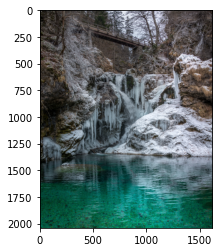

In [19]:
print(val_img_arrays[0].shape)
arr_ = np.squeeze(val_img_arrays[0])
plt.imshow(arr_)
plt.show

# Patchify

In [20]:
size = 64
import time

In [21]:
!rm -rf /content/Data_set_64
!rm -rf /content/Data_set_val_64

In [22]:
!rm -rf /gdrive/MyDrive/Doctorate_Thesis_Coding/COMPSR-NET/Data_for_training/Patches/Train/64x64

In [ ]:
import os.path
from os import path

if path.exists(f'/content/Data_set_{size}') == False:
  os.mkdir(f'/content/Data_set_{size}')
  for i in range(10, 801, 10):
    os.mkdir(f'/content/Data_set_{size}/{i}')

os.chdir(f'/content/Data_set_{size}')
!pwd
!ls

/content/Data_set_64
10   140  190  230  280  320  370  410	460  500  550  60   640  690  730  780
100  150  20   240  290  330  380  420	470  510  560  600  650  70   740  790
110  160  200  250  30	 340  390  430	480  520  570  610  660  700  750  80
120  170  210  260  300  350  40   440	490  530  580  620  670  710  760  800
130  180  220  270  310  360  400  450	50   540  590  630  680  720  770  90


In [ ]:
import os.path
from os import path

if path.exists(f'/content/Data_set_val_{size}') == False:
  os.mkdir(f'/content/Data_set_val_{size}')
  for i in range(10, 101, 10):
    print(i)
    os.mkdir(f'/content/Data_set_val_{size}/{i}')

os.chdir(f'/content/Data_set_val_{size}')
!pwd
!ls

10
20
30
40
50
60
70
80
90
100
/content/Data_set_val_64
10  100  20  30  40  50  60  70  80  90


In [ ]:
folders = []
for f in range(10, 801, 10):
  folders.append(f)

print(folders)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800]


In [ ]:
a = 0
for k in range(len(img_paths)):
  if k<folders[a]:
    print(k, folders[a])
  else:
    print(k, folders[a+1])
    a+=1

0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 30
21 30
22 30
23 30
24 30
25 30
26 30
27 30
28 30
29 30
30 40
31 40
32 40
33 40
34 40
35 40
36 40
37 40
38 40
39 40
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 60
51 60
52 60
53 60
54 60
55 60
56 60
57 60
58 60
59 60
60 70
61 70
62 70
63 70
64 70
65 70
66 70
67 70
68 70
69 70
70 80
71 80
72 80
73 80
74 80
75 80
76 80
77 80
78 80
79 80
80 90
81 90
82 90
83 90
84 90
85 90
86 90
87 90
88 90
89 90
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100
100 110
101 110
102 110
103 110
104 110
105 110
106 110
107 110
108 110
109 110
110 120
111 120
112 120
113 120
114 120
115 120
116 120
117 120
118 120
119 120
120 130
121 130
122 130
123 130
124 130
125 130
126 130
127 130
128 130
129 130
130 140
131 140
132 140
133 140
134 140
135 140
136 140
137 140
138 140
139 140
140 150
141 150
142 150
143 150
144 150
145 150
146 150
147 150
148 150
149 150


In [ ]:
a = 0
for k in range(len(img_paths)):
  one_image = img_arrays[k]
  patches_img = patchify(one_image, (size,size,3), step = size)
  for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        single_patch_img = patches_img[i, j, 0, :, :, :]
        patch = Image.fromarray(single_patch_img, 'RGB')
        patch.save(f"../Data_for_training//Patches/Train/64x64/patch_{k}_{i}_{j}.jpg")
  print(k)

KeyboardInterrupt: ignored

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

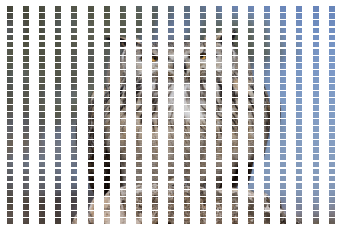

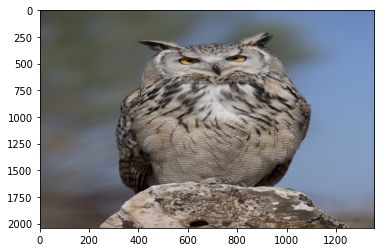

49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

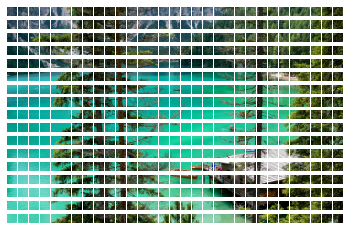

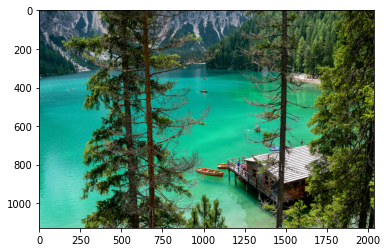

99


In [ ]:
for k in range(len(val_img_paths)):
  one_image = val_img_arrays[k]
  patches_img = patchify(one_image, (size,size,3), step = size)
  for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        single_patch_img = patches_img[i, j, 0, :, :, :]
        patch = Image.fromarray(single_patch_img, 'RGB')
        if k<10:
          patch.save(f"/content/Data_set_val_{size}/10/patch_{k}_{i}_{j}.jpg")
        elif k<20:
          patch.save(f"/content/Data_set_val_{size}/20/patch_{k}_{i}_{j}.jpg")
        elif k<30:
          patch.save(f"/content/Data_set_val_{size}/30/patch_{k}_{i}_{j}.jpg")
        elif k<40:
          patch.save(f"/content/Data_set_val_{size}/40/patch_{k}_{i}_{j}.jpg")
        elif k<50:
          patch.save(f"/content/Data_set_val_{size}/50/patch_{k}_{i}_{j}.jpg")
        elif k<60:
          patch.save(f"/content/Data_set_val_{size}/60/patch_{k}_{i}_{j}.jpg")
        elif k<70:
          patch.save(f"/content/Data_set_val_{size}/70/patch_{k}_{i}_{j}.jpg")
        elif k<80:
          patch.save(f"/content/Data_set_val_{size}/80/patch_{k}_{i}_{j}.jpg")
        elif k<90:
          patch.save(f"/content/Data_set_val_{size}/90/patch_{k}_{i}_{j}.jpg")
        else:
          patch.save(f"/content/Data_set_val_{size}/100/patch_{k}_{i}_{j}.jpg")

  rows = patches_img.shape[0]
  columns =patches_img.shape[1]
  fig = plt.figure()
  counter = 1

  if (k+1)%50 == 0:
    for m in range(patches_img.shape[0]):
      for n in range(patches_img.shape[1]):
        fig.add_subplot(rows, columns, counter)
        counter +=1
        plt.imshow(patches_img[m, n, 0, :, :, :])
        plt.axis('off')
    
    plt.show()
    plt.close()

    im = Image.open(val_img_paths[k])
    plt.imshow(im, aspect='auto')
    plt.show()
    plt.close()

  print(k)

In [ ]:
import os
total = 0
for f in range(10, 801, 10):
  FOLDER_PATH = f'Data_set_{size}/{f}'
  ROOT_PATH = '/content'
  total += len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)))
print(total)

522939


In [ ]:
import os
total = 0
for f in range(10, 101, 10):
  FOLDER_PATH = f'Data_set_val_{size}/{f}'
  ROOT_PATH = '/content'
  total += len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)))
print(total)

66650


In [ ]:
!zip -r /content/Data_set_64 /content/Data_set_64

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  adding: content/Data_set_64/380/patch_371_2_30.jpg (deflated 26%)
  adding: content/Data_set_64/380/patch_373_6_5.jpg (deflated 11%)
  adding: content/Data_set_64/380/patch_373_20_14.jpg (deflated 13%)
  adding: content/Data_set_64/380/patch_378_8_26.jpg (deflated 14%)
  adding: content/Data_set_64/380/patch_371_4_24.jpg (deflated 12%)
  adding: content/Data_set_64/380/patch_379_9_18.jpg (deflated 9%)
  adding: content/Data_set_64/380/patch_375_11_28.jpg (deflated 11%)
  adding: content/Data_set_64/380/patch_371_9_18.jpg (deflated 8%)
  adding: content/Data_set_64/380/patch_372_20_11.jpg (deflated 16%)
  adding: content/Data_set_64/380/patch_372_20_1.jpg (deflated 26%)
  adding: content/Data_set_64/380/patch_376_3_13.jpg (deflated 7%)
  adding: content/Data_set_64/380/patch_375_20_30.jpg (deflated 14%)
  adding: content/Data_set_64/380/patch_372_11_22.jpg (deflated 15%)
  adding: content/Data_set_64/380/patch_371_21_9

In [ ]:
!zip -r /content/Data_set_val_64 /content/Data_set_val_64

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  adding: content/Data_set_val_64/70/patch_69_18_4.jpg (deflated 23%)
  adding: content/Data_set_val_64/70/patch_66_6_16.jpg (deflated 20%)
  adding: content/Data_set_val_64/70/patch_68_10_2.jpg (deflated 10%)
  adding: content/Data_set_val_64/70/patch_60_7_14.jpg (deflated 9%)
  adding: content/Data_set_val_64/70/patch_65_5_26.jpg (deflated 8%)
  adding: content/Data_set_val_64/70/patch_61_0_11.jpg (deflated 15%)
  adding: content/Data_set_val_64/70/patch_65_18_1.jpg (deflated 9%)
  adding: content/Data_set_val_64/70/patch_67_15_6.jpg (deflated 11%)
  adding: content/Data_set_val_64/70/patch_68_10_10.jpg (deflated 10%)
  adding: content/Data_set_val_64/70/patch_61_12_12.jpg (deflated 15%)
  adding: content/Data_set_val_64/70/patch_61_10_14.jpg (deflated 12%)
  adding: content/Data_set_val_64/70/patch_61_19_18.jpg (deflated 9%)
  adding: content/Data_set_val_64/70/patch_66_10_13.jpg (deflated 23%)
  adding: content/Data

In [ ]:
from google.colab import files
files.download(f"/content/Data_set_{size}.zip")
files.download(f"/content/Data_set_val_{size}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!mv /content/Data_set_64/20 /gdrive/MyDrive/Doctorate_Thesis_Coding/COMPSR-NET/Patches/Train/64x64/

In [ ]:
move = "/content/Data_set_64/30"

In [ ]:
for f in range(40, 801, 10):
  move = f"/content/Data_set_64/{f}"
  !mv $move /gdrive/MyDrive/Doctorate_Thesis_Coding/COMPSR-NET/Patches/Train/64x64/

^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C
^C


KeyboardInterrupt: ignored